In [3]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Abhishek Jadhav\Codes\Machine Learning\DL Assignments\dl_assignments_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


In [6]:
train_data = pd.read_csv("./LP-IV-datasets/MNIST(Ass2&3)/mnist_train.csv")

In [7]:
test_data = pd.read_csv("./LP-IV-datasets/MNIST(Ass2&3)/mnist_test.csv")

In [8]:
train_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
x_train=train_data.drop(['label'],axis=1).values
y_train=train_data['label'].values

In [14]:
len(x_train)

60000

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [16]:
x_test=test_data.drop(['label'],axis=1).values
y_test=test_data['label'].values

In [17]:
len(x_test)

10000

In [18]:
x_train=x_train/255
x_test=x_test/255

In [19]:
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)


In [20]:
x_train = x_train.astype('float32')
x_test=x_test.astype('float32')

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
model = Sequential()
model.add(Dense(128,input_shape=(784,),activation ='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='sgd',metrics=['accuracy'],loss=SparseCategoricalCrossentropy())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
epochs=11
h=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs)

Epoch 1/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1295 - accuracy: 0.9620 - val_loss: 0.1091 - val_accuracy: 0.9662
Epoch 2/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1205 - accuracy: 0.9652 - val_loss: 0.1033 - val_accuracy: 0.9671
Epoch 3/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1156 - accuracy: 0.9663 - val_loss: 0.0989 - val_accuracy: 0.9693
Epoch 4/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1091 - accuracy: 0.9689 - val_loss: 0.0955 - val_accuracy: 0.9693
Epoch 5/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1051 - accuracy: 0.9701 - val_loss: 0.0924 - val_accuracy: 0.9713
Epoch 6/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0989 - accuracy: 0.9711 - val_loss: 0.0907 - val_accuracy: 0.9717
Epoch 7/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0955 - accuracy: 0.9725 - val_loss: 0.0885 - val_accuracy:

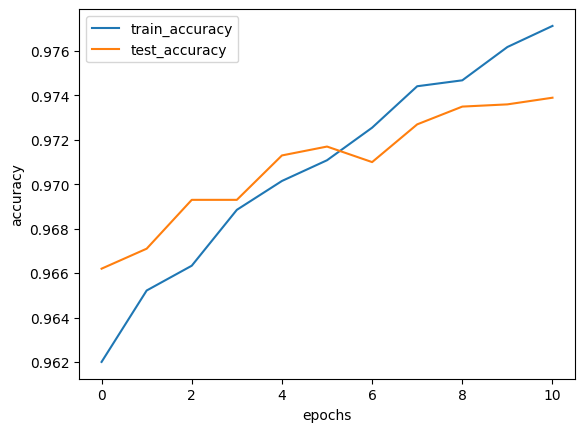

In [29]:
plt.plot(range(0,epochs),h.history['accuracy'],label='train_accuracy')
plt.plot(range(0,epochs),h.history['val_accuracy'],label='test_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

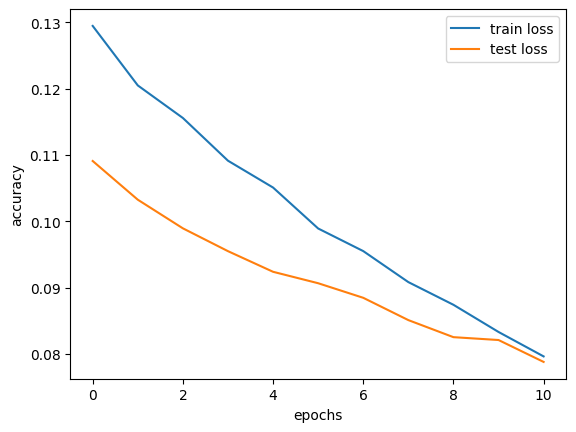

In [30]:
plt.plot(range(0,epochs),h.history['loss'],label='train loss')
plt.plot(range(0,epochs),h.history['val_loss'],label='test loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()